In [1]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
%matplotlib inline

In [2]:
seed_urls = ['https://inshorts.com/en/read/technology',
             'https://inshorts.com/en/read/sports',
             'https://inshorts.com/en/read/world']

def build_dataset(seed_urls):
    news_data = []
    for url in seed_urls:
        news_category = url.split('/')[-1]
        data = requests.get(url)
        soup = BeautifulSoup(data.content, 'html.parser')
        
        news_articles = [{'news_headline': headline.find('span', 
                                                         attrs={"itemprop": "headline"}).string,
                          'news_article': article.find('div', 
                                                       attrs={"itemprop": "articleBody"}).string,
                          'news_category': news_category}
                         
                            for headline, article in 
                             zip(soup.find_all('div', 
                                               class_=["news-card-title news-right-box"]),
                                 soup.find_all('div', 
                                               class_=["news-card-content news-right-box"]))
                        ]
        news_data.extend(news_articles)
        
    df =  pd.DataFrame(news_data)
    df = df[['news_headline', 'news_article', 'news_category']]
    return df

In [3]:
news_df = build_dataset(seed_urls)
news_df.head(10)

,news_headline,news_article,news_category
0,OnePlus 8 Pro to feature super fast 30W wirele...,The first OnePlus phone to support wireless ch...,technology
1,IIT-G develops LED-based device for sanitising...,"Indian Institute of Technology, Guwahati (IIT-...",technology
2,Google Search for 'Living room concert' increa...,Google Trends data shows the search for 'Livin...,technology
3,COVID-19 tracker app 'Aarogya Setu' is not a s...,After a newspaper article claimed that the COV...,technology
4,Twitter CEO to donate 28% of wealth for COVID-...,Twitter CEO Jack Dorsey has pledged $1 billion...,technology
5,What is a rapid antibody test for coronavirus?,When a person gets infected by a virus or any ...,technology
6,Facebook launches messaging app 'Tuned' for co...,Facebook's New Product Experimentation (NPE) T...,technology
7,CBSE to introduce 3 new subjects including Art...,"The CBSE will introduce Design-thinking, Physi...",technology
8,Rajasthan HC quashes FIR against Twitter CEO o...,The Rajasthan High Court on Tuesday quashed th...,technology
9,WhatsApp makes group calling easier amid coron...,WhatsApp has made it easier to start a group c...,technology


In [4]:
news_df.describe()

,news_headline,news_article,news_category
count,73,73,73
unique,72,72,3
top,Kenyan runners run solo half marathons for vir...,A group of 30 Kenyan runners from across the c...,world
freq,2,2,25


In [5]:
news_df.dtypes

news_headline    object
news_article     object
news_category    object
dtype: object

In [6]:
news_df.shape

(73, 3)

In [7]:
news_df.news_category.value_counts()

world         25
sports        24
technology    24
Name: news_category, dtype: int64

In [8]:
import spacy
import pandas as pd
import numpy as np
import nltk
from nltk.tokenize.toktok import ToktokTokenizer
import re
from bs4 import BeautifulSoup
from contractions import CONTRACTION_MAP
import unicodedata


In [9]:
spacy.load('en_core_web_md')

In [10]:
spacy.load('en')

In [11]:
import spacy
import en_core_web_md
nlp = en_core_web_md.load()

In [12]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to C:\Users\H P
[nltk_data]     PC\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [13]:
#nlp = spacy.load('en_core', parse=True, tag=True, entity=True)
#nlp_vec = spacy.load('en_vecs', parse = True, tag=True, #entity=True)
tokenizer = ToktokTokenizer()
stopword_list = nltk.corpus.stopwords.words('english')
stopword_list.remove('no')
stopword_list.remove('not')

In [14]:
def strip_html_tags(text):
    soup = BeautifulSoup(text, "html.parser")
    stripped_text = soup.get_text()
    return stripped_text

strip_html_tags('<html><h2>Some important text</h2></html>')

'Some important text'

In [15]:
def remove_accented_chars(text):
    text = unicodedata.normalize('NFKD', text).encode('ascii', 'ignore').decode('utf-8', 'ignore')
    return text

remove_accented_chars('Sómě Áccěntěd těxt')

'Some Accented text'

In [16]:
def expand_contractions(text, contraction_mapping=CONTRACTION_MAP):
    
    contractions_pattern = re.compile('({})'.format('|'.join(contraction_mapping.keys())), 
                                      flags=re.IGNORECASE|re.DOTALL)
    def expand_match(contraction):
        match = contraction.group(0)
        first_char = match[0]
        expanded_contraction = contraction_mapping.get(match)\
                                if contraction_mapping.get(match)\
                                else contraction_mapping.get(match.lower())                       
        expanded_contraction = first_char+expanded_contraction[1:]
        return expanded_contraction
        
    expanded_text = contractions_pattern.sub(expand_match, text)
    expanded_text = re.sub("'", "", expanded_text)
    return expanded_text

expand_contractions("Y'all can't expand contractions I'd think")

'You all cannot expand contractions I would think'

In [17]:
def remove_special_characters(text, remove_digits=False):
    pattern = r'[^a-zA-z0-9\s]' if not remove_digits else r'[^a-zA-z\s]'
    text = re.sub(pattern, '', text)
    return text

remove_special_characters("Well this was fun! What do you think? 123#@!", 
                          remove_digits=True)

'Well this was fun What do you think '

In [18]:
def simple_stemmer(text):
    ps = nltk.porter.PorterStemmer()
    text = ' '.join([ps.stem(word) for word in text.split()])
    return text

simple_stemmer("My system keeps crashing his crashed yesterday, ours crashes daily")

'My system keep crash hi crash yesterday, our crash daili'

In [19]:
def lemmatize_text(text):
    text = nlp(text)
    text = ' '.join([word.lemma_ if word.lemma_ != '-PRON-' else word.text for word in text])
    return text

lemmatize_text("My system keeps crashing! his crashed yesterday, ours crashes daily")

'My system keep crash ! his crash yesterday , ours crash daily'

In [20]:
def remove_stopwords(text, is_lower_case=False):
    tokens = tokenizer.tokenize(text)
    tokens = [token.strip() for token in tokens]
    if is_lower_case:
        filtered_tokens = [token for token in tokens if token not in stopword_list]
    else:
        filtered_tokens = [token for token in tokens if token.lower() not in stopword_list]
    filtered_text = ' '.join(filtered_tokens)    
    return filtered_text

remove_stopwords("The, and, if are stopwords, computer is not")

', , stopwords , computer not'

In [21]:
def normalize_corpus(corpus, html_stripping=True, contraction_expansion=True,
                     accented_char_removal=True, text_lower_case=True, 
                     text_lemmatization=True, special_char_removal=True, 
                     stopword_removal=True, remove_digits=True):
    
    normalized_corpus = []
    # normalize each document in the corpus
    for doc in corpus:
        # strip HTML
        if html_stripping:
            doc = strip_html_tags(doc)
        # remove accented characters
        if accented_char_removal:
            doc = remove_accented_chars(doc)
        # expand contractions    
        if contraction_expansion:
            doc = expand_contractions(doc)
        # lowercase the text    
        if text_lower_case:
            doc = doc.lower()
        # remove extra newlines
        doc = re.sub(r'[\r|\n|\r\n]+', ' ',doc)
        # lemmatize text
        if text_lemmatization:
            doc = lemmatize_text(doc)
        # remove special characters and\or digits    
        if special_char_removal:
            # insert spaces between special characters to isolate them    
            special_char_pattern = re.compile(r'([{.(-)!}])')
            doc = special_char_pattern.sub(" \\1 ", doc)
            doc = remove_special_characters(doc, remove_digits=remove_digits)  
        # remove extra whitespace
        doc = re.sub(' +', ' ', doc)
        # remove stopwords
        if stopword_removal:
            doc = remove_stopwords(doc, is_lower_case=text_lower_case)
            
        normalized_corpus.append(doc)
        
    return normalized_corpus

In [22]:
# combining headline and article text
news_df['full_text'] = news_df["news_headline"].map(str)+ '. ' + news_df["news_article"]

# pre-process text and store the same
news_df['clean_text'] = normalize_corpus(news_df['full_text'])
norm_corpus = list(news_df['clean_text'])

# show a sample news article
news_df.iloc[1][['full_text', 'clean_text']].to_dict()

{'full_text': 'IIT-G develops LED-based device for sanitising floors amid COVID-19 spread. Indian Institute of Technology, Guwahati (IIT-G) has created a UVC LED-based device to sanitise floors of homes, hospitals, buses etc. amid coronavirus spread. UVC is a technology to sanitise microorganism infected non-porous surfaces and can achieve 90% killing rate, said Dr Senthilmurugan Subbiah, who led the research. The device, when commercialised, may be available for ₹1,000, reported PTI.',
 'clean_text': 'iit g develop lead base device sanitise floor amid covid spread indian institute technology guwahati iit g create uvc lead base device sanitise floor home hospital bus etc amid coronavirus spread uvc technology sanitise microorganism infect non porous surface achieve killing rate say dr senthilmurugan subbiah lead research device commercialise may available report pti'}

In [23]:
news_df.to_csv('news.csv', index=False, encoding='utf-8')

In [24]:
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\H P PC\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


True

In [25]:
# create a basic pre-processed corpus, don't lowercase to get POS context
corpus = normalize_corpus(news_df['full_text'], text_lower_case=False, 
                          text_lemmatization=False, special_char_removal=False)

# demo for POS tagging for sample news headline
sentence = str(news_df.iloc[1].news_headline)
sentence_nlp = nlp(sentence)

# POS tagging with Spacy 
spacy_pos_tagged = [(word, word.tag_, word.pos_) for word in sentence_nlp]
pd.DataFrame(spacy_pos_tagged, columns=['Word', 'POS tag', 'Tag type'])

,Word,POS tag,Tag type
0,IIT,NNP,PROPN
1,-,HYPH,PUNCT
2,G,NNP,PROPN
3,develops,VBZ,VERB
4,LED,NN,NOUN
5,-,HYPH,PUNCT
6,based,VBN,VERB
7,device,NN,NOUN
8,for,IN,ADP
9,sanitising,VBG,VERB


In [26]:
# POS tagging with nltk
nltk_pos_tagged = nltk.pos_tag(sentence.split())
pd.DataFrame(nltk_pos_tagged, columns=['Word', 'POS tag'])

,Word,POS tag
0,IIT-G,JJ
1,develops,VBZ
2,LED-based,JJ
3,device,NN
4,for,IN
5,sanitising,VBG
6,floors,NNS
7,amid,IN
8,COVID-19,NNP
9,spread,NN


In [27]:
nltk.download('conll2000')

[nltk_data] Downloading package conll2000 to C:\Users\H P
[nltk_data]     PC\AppData\Roaming\nltk_data...
[nltk_data]   Package conll2000 is already up-to-date!


True

In [28]:
from nltk.corpus import conll2000

data = conll2000.chunked_sents()
train_data = data[:10900]
test_data = data[10900:] 

print(len(train_data), len(test_data))
print(train_data[1]) 

10900 48
(S
  Chancellor/NNP
  (PP of/IN)
  (NP the/DT Exchequer/NNP)
  (NP Nigel/NNP Lawson/NNP)
  (NP 's/POS restated/VBN commitment/NN)
  (PP to/TO)
  (NP a/DT firm/NN monetary/JJ policy/NN)
  (VP has/VBZ helped/VBN to/TO prevent/VB)
  (NP a/DT freefall/NN)
  (PP in/IN)
  (NP sterling/NN)
  (PP over/IN)
  (NP the/DT past/JJ week/NN)
  ./.)


In [29]:
from nltk.chunk.util import tree2conlltags, conlltags2tree

wtc = tree2conlltags(train_data[1])
wtc

[('Chancellor', 'NNP', 'O'),
 ('of', 'IN', 'B-PP'),
 ('the', 'DT', 'B-NP'),
 ('Exchequer', 'NNP', 'I-NP'),
 ('Nigel', 'NNP', 'B-NP'),
 ('Lawson', 'NNP', 'I-NP'),
 ("'s", 'POS', 'B-NP'),
 ('restated', 'VBN', 'I-NP'),
 ('commitment', 'NN', 'I-NP'),
 ('to', 'TO', 'B-PP'),
 ('a', 'DT', 'B-NP'),
 ('firm', 'NN', 'I-NP'),
 ('monetary', 'JJ', 'I-NP'),
 ('policy', 'NN', 'I-NP'),
 ('has', 'VBZ', 'B-VP'),
 ('helped', 'VBN', 'I-VP'),
 ('to', 'TO', 'I-VP'),
 ('prevent', 'VB', 'I-VP'),
 ('a', 'DT', 'B-NP'),
 ('freefall', 'NN', 'I-NP'),
 ('in', 'IN', 'B-PP'),
 ('sterling', 'NN', 'B-NP'),
 ('over', 'IN', 'B-PP'),
 ('the', 'DT', 'B-NP'),
 ('past', 'JJ', 'I-NP'),
 ('week', 'NN', 'I-NP'),
 ('.', '.', 'O')]

In [30]:
tree = conlltags2tree(wtc) 
print(tree)

(S
  Chancellor/NNP
  (PP of/IN)
  (NP the/DT Exchequer/NNP)
  (NP Nigel/NNP Lawson/NNP)
  (NP 's/POS restated/VBN commitment/NN)
  (PP to/TO)
  (NP a/DT firm/NN monetary/JJ policy/NN)
  (VP has/VBZ helped/VBN to/TO prevent/VB)
  (NP a/DT freefall/NN)
  (PP in/IN)
  (NP sterling/NN)
  (PP over/IN)
  (NP the/DT past/JJ week/NN)
  ./.)


In [31]:
def conll_tag_chunks(chunk_sents):
    tagged_sents = [tree2conlltags(tree) for tree in chunk_sents]
    return [[(t, c) for (w, t, c) in sent] for sent in tagged_sents]


def combined_tagger(train_data, taggers, backoff=None):
    for tagger in taggers:
        backoff = tagger(train_data, backoff=backoff)
    return backoff 

In [32]:
from nltk.tag import UnigramTagger, BigramTagger
from nltk.chunk import ChunkParserI

# define the chunker class
class NGramTagChunker(ChunkParserI):
    
  def __init__(self, train_sentences, 
               tagger_classes=[UnigramTagger, BigramTagger]):
    train_sent_tags = conll_tag_chunks(train_sentences)
    self.chunk_tagger = combined_tagger(train_sent_tags, tagger_classes)

  def parse(self, tagged_sentence):
    if not tagged_sentence: 
        return None
    pos_tags = [tag for word, tag in tagged_sentence]
    chunk_pos_tags = self.chunk_tagger.tag(pos_tags)
    chunk_tags = [chunk_tag for (pos_tag, chunk_tag) in chunk_pos_tags]
    wpc_tags = [(word, pos_tag, chunk_tag) for ((word, pos_tag), chunk_tag)
                     in zip(tagged_sentence, chunk_tags)]
    return conlltags2tree(wpc_tags)
  
# train chunker model  
ntc = NGramTagChunker(train_data)

# evaluate chunker model performance
print(ntc.evaluate(test_data))

ChunkParse score:
    IOB Accuracy:  90.0%%
    Precision:     82.1%%
    Recall:        86.3%%
    F-Measure:     84.1%%


In [33]:
chunk_tree = ntc.parse(nltk_pos_tagged)
print(chunk_tree)

(S
  (NP IIT-G/JJ)
  (VP develops/VBZ)
  (NP LED-based/JJ device/NN)
  (PP for/IN)
  (VP sanitising/VBG)
  (NP floors/NNS)
  (PP amid/IN)
  (NP COVID-19/NNP spread/NN))


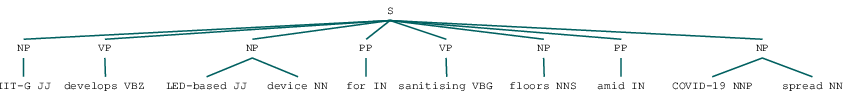

In [34]:
from IPython.display import display

os.environ['PATH'] = os.environ['PATH']+";C:\\Program Files\\gs\\gs9.52\\bin\\"

display(chunk_tree)

In [69]:
# set java path
import os   #C:\Program Files\Java\jdk-14\bin
java_path = r'C:\Program Files\Java\jdk-14\bin\java.exe'
os.environ['JAVAHOME'] = java_path

from nltk.parse.corenlp import CoreNLPDependencyParser

scp =  CoreNLPDependencyParser(path_to_jar='E:/stanford/stanford-parser-full-2015-04-20/stanford-parser.jar',
                     path_to_models_jar='E:/stanford/stanford-parser-full-2015-04-20/stanford-parser-3.5.2-models.jar')
                   
result = list(scp.raw_parse(sentence))
print(result[0])

TypeError: __init__() got an unexpected keyword argument 'path_to_jar'

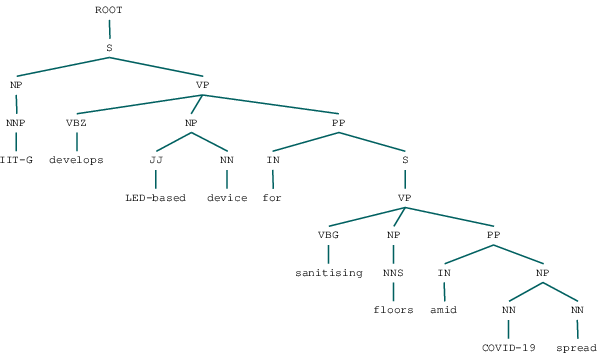

In [52]:
from IPython.display import display
display(result[0])

In [36]:
dependency_pattern = '{left}<---{word}[{w_type}]--->{right}\n--------'
for token in sentence_nlp:
    print(dependency_pattern.format(word=token.orth_, 
                                  w_type=token.dep_,
                                  left=[t.orth_ 
                                            for t 
                                            in token.lefts],
                                  right=[t.orth_ 
                                             for t 
                                             in token.rights]))

[]<---IIT[compound]--->[]
--------
[]<----[punct]--->[]
--------
['IIT', '-']<---G[nsubj]--->[]
--------
['G']<---develops[ROOT]--->['device']
--------
[]<---LED[npadvmod]--->[]
--------
[]<----[punct]--->[]
--------
['LED', '-']<---based[amod]--->[]
--------
['based']<---device[dobj]--->['for']
--------
[]<---for[prep]--->['sanitising']
--------
[]<---sanitising[pcomp]--->['floors', 'amid']
--------
[]<---floors[dobj]--->[]
--------
[]<---amid[prep]--->['spread']
--------
[]<---COVID-19[nummod]--->[]
--------
['COVID-19']<---spread[pobj]--->[]
--------


In [37]:
from spacy import displacy

displacy.render(sentence_nlp, jupyter=True, 
                options={'distance': 110,
                         'arrow_stroke': 2,
                         'arrow_width': 8})

In [ ]:
# visualize annotated dependency tree (needs graphviz)
from graphviz import Source
dep_tree_dot_repr = [parse for parse in result][0].to_dot()
source = Source(dep_tree_dot_repr, filename="dep_tree", format="png")
source

In [38]:
sentence = str(news_df.iloc[1].full_text)
sentence_nlp = nlp(sentence)

# print named entities in article
print([(word, word.ent_type_) for word in sentence_nlp if word.ent_type_])

# visualize named entities
displacy.render(sentence_nlp, style='ent', jupyter=True)

[(IIT, 'ORG'), (-, 'ORG'), (G, 'ORG'), (Indian, 'ORG'), (Institute, 'ORG'), (of, 'ORG'), (Technology, 'ORG'), (Guwahati, 'GPE'), (IIT, 'ORG'), (-, 'ORG'), (G, 'ORG'), (UVC, 'ORG'), (UVC, 'ORG'), (90, 'PERCENT'), (%, 'PERCENT'), (Senthilmurugan, 'PERSON'), (Subbiah, 'PERSON'), (₹1,000, 'PERSON'), (PTI, 'ORG')]


In [39]:
named_entities = []
for sentence in corpus:
    temp_entity_name = ''
    temp_named_entity = None
    sentence = nlp(sentence)
    for word in sentence:
        term = word.text 
        tag = word.ent_type_
        if tag:
            temp_entity_name = ' '.join([temp_entity_name, term]).strip()
            temp_named_entity = (temp_entity_name, tag)
        else:
            if temp_named_entity:
                named_entities.append(temp_named_entity)
                temp_entity_name = ''
                temp_named_entity = None

entity_frame = pd.DataFrame(named_entities, 
                            columns=['Entity Name', 'Entity Type'])

In [40]:
# get the top named entities
top_entities = (entity_frame.groupby(by=['Entity Name', 'Entity Type'])
                           .size()
                           .sort_values(ascending=False)
                           .reset_index().rename(columns={0 : 'Frequency'}))
top_entities.T.iloc[:,:15]

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
Entity Name,India,US,Facebook,Spain,Pakistan,Australian,half,Kohli,Donald Trump,Italy,Wisconsin,WhatsApp,Trump,China,Microsoft
Entity Type,GPE,GPE,ORG,GPE,GPE,NORP,CARDINAL,PERSON,PERSON,GPE,GPE,ORG,ORG,GPE,ORG
Frequency,26,21,7,6,6,5,5,5,5,5,4,4,4,4,4


In [41]:
# get the top named entity types
top_entities = (entity_frame.groupby(by=['Entity Type'])
                           .size()
                           .sort_values(ascending=False)
                           .reset_index().rename(columns={0 : 'Frequency'}))
top_entities.T.iloc[:,:15]

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
Entity Type,ORG,PERSON,GPE,CARDINAL,DATE,NORP,PRODUCT,MONEY,PERCENT,ORDINAL,TIME,LOC,EVENT,WORK_OF_ART,FAC
Frequency,156,133,127,66,51,32,16,13,12,9,6,6,6,2,2


In [42]:
# initialize afinn sentiment analyzer
from afinn import Afinn
af = Afinn()

# compute sentiment scores (polarity) and labels
sentiment_scores = [af.score(article) for article in corpus]
sentiment_category = ['positive' if score > 0 
                          else 'negative' if score < 0 
                              else 'neutral' 
                                  for score in sentiment_scores]
    
    
# sentiment statistics per news category
df = pd.DataFrame([list(news_df['news_category']), sentiment_scores, sentiment_category]).T
df.columns = ['news_category', 'sentiment_score', 'sentiment_category']
df['sentiment_score'] = df.sentiment_score.astype('float')
df.groupby(by=['news_category']).describe()

sentiment_score                                                
                        count      mean       std   min  25%  50%   75%   max
news_category                                                                
sports                   24.0 -0.541667  6.467169 -21.0 -2.0 -1.0  3.75   9.0
technology               24.0 -0.583333  5.266107 -10.0 -5.0  0.0  2.25  12.0
world                    25.0 -3.560000  7.263378 -28.0 -7.0 -2.0  0.00   8.0

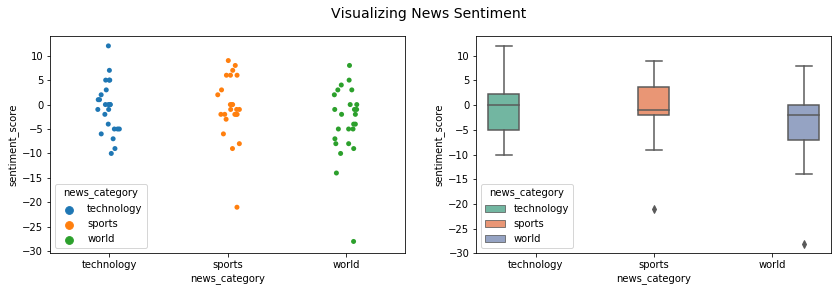

In [43]:
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 4))
sp = sns.stripplot(x='news_category', y="sentiment_score", 
                   hue='news_category', data=df, ax=ax1)
bp = sns.boxplot(x='news_category', y="sentiment_score", 
                 hue='news_category', data=df, palette="Set2", ax=ax2)
t = f.suptitle('Visualizing News Sentiment', fontsize=14)

C:\Users\H P PC\Anaconda3\lib\site-packages\seaborn\categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


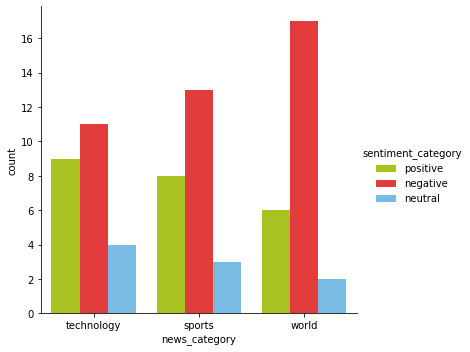

In [44]:
fc = sns.factorplot(x="news_category", hue="sentiment_category", 
                    data=df, kind="count", 
                    palette={"negative": "#FE2020", 
                             "positive": "#BADD07", 
                             "neutral": "#68BFF5"})

In [45]:
pos_idx = df[(df.news_category=='sports') & (df.sentiment_score == 9)].index[0]
neg_idx = df[(df.news_category=='sports') & (df.sentiment_score == -21)].index[0]

print('Most Negative Sports News Article:', news_df.iloc[neg_idx][['news_article']][0])
print()
print('Most Positive Sports News Article:', news_df.iloc[pos_idx][['news_article']][0])

Most Negative Sports News Article: Russia has "categorically" denied allegations that it had bribed FIFA officials for the right to host the 2018 FIFA World Cup. "Russia absolutely legally got the right," Kremlin spokesman Dmitry Peskov said. The allegations are linked to the 2015 corruption scandal that led to then FIFA President Sepp Blatter along with UEFA chief Michel Platini being banned. 

Most Positive Sports News Article: During an Instagram live, ex-Australia spinner Shane Warne said that former West Indies cricketer Viv Richards is the best batsman he has ever seen but Virat Kohli is "pushing that conversation". Warne further named the India skipper among the three best batsmen of this generation along with Steve Smith and Kane Williamson. Virat has 11,867 runs from 248 ODIs. 


In [46]:
pos_idx = df[(df.news_category=='world') & (df.sentiment_score == 5)].index[0]
neg_idx = df[(df.news_category=='world') & (df.sentiment_score == -28)].index[0]

print('Most Negative World News Article:', news_df.iloc[neg_idx][['news_article']][0])
print()
print('Most Positive World News Article:', news_df.iloc[pos_idx][['news_article']][0])

Most Negative World News Article: Truck driver Maurice Robinson has pleaded guilty to 39 counts of manslaughter in the case related to the deaths of Vietnamese people in a refrigerated container found in the UK last year. Co-defendant Gheorghe Nica pleaded not guilty to the same offences. Autopsies had concluded that all the victims died from asphyxia and hyperthermia.

Most Positive World News Article: External Affairs Minister S Jaishankar has said India is "responding positively" to the pharmaceutical requirements of Australia and Spain. Jaishankar held phone conversations with his Australian counterpart Marise Payne and Spanish counterpart Arancha González over their responses to the coronavirus pandemic. He added that India will make arrangements for Australians wishing to return home.


In [47]:
pos_idx = df[(df.news_category=='technology') & (df.sentiment_score == 12)].index[0]
neg_idx = df[(df.news_category=='technology') & (df.sentiment_score == -10)].index[0]

print('Most Negative Technology News Article:', news_df.iloc[neg_idx][['news_article']][0])
print()
print('Most Positive Technology News Article:', news_df.iloc[pos_idx][['news_article']][0])

Most Negative Technology News Article: Video-calling platform Zoom has been sued by one of its shareholders, Michael Drieu, for not disclosing that its service was not end-to-end encrypted. Drieu also accused Zoom of not disclosing that it shared unauthorised personal information with Facebook. Zoom has lost nearly a third of its market value since touching record highs in late-March, closing down about 7.5% on Tuesday.

Most Positive Technology News Article: Twitter CEO Jack Dorsey has pledged $1 billion of his stake in Square Inc, the payments processor that he co-founded, to fund coronavirus relief efforts. It's the largest pledged gift by a private individual yet during the pandemic, Forbes claimed. Dorsey said the amount, representing about 28% of his wealth, will be donated to his charity fund, Start Small LLC.


In [48]:
from textblob import TextBlob

# compute sentiment scores (polarity) and labels
sentiment_scores_tb = [round(TextBlob(article).sentiment.polarity, 3) for article in news_df['clean_text']]
sentiment_category_tb = ['positive' if score > 0 
                             else 'negative' if score < 0 
                                 else 'neutral' 
                                     for score in sentiment_scores_tb]


# sentiment statistics per news category
df = pd.DataFrame([list(news_df['news_category']), sentiment_scores_tb, sentiment_category_tb]).T
df.columns = ['news_category', 'sentiment_score', 'sentiment_category']
df['sentiment_score'] = df.sentiment_score.astype('float')
df.groupby(by=['news_category']).describe()

sentiment_score                                              \
                        count      mean       std    min      25%     50%   
news_category                                                               
sports                   24.0  0.105875  0.220834 -0.333  0.00725  0.0450   
technology               24.0 -0.001625  0.199159 -0.400 -0.13475  0.0125   
world                    25.0  0.042720  0.155528 -0.300 -0.03100  0.0650   

                               
                   75%    max  
news_category                  
sports         0.26575  0.515  
technology     0.15900  0.350  
world          0.11700  0.300

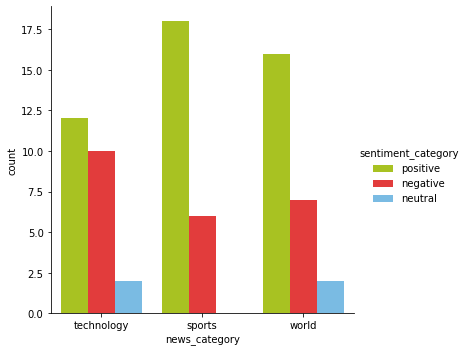

In [49]:
fc = sns.factorplot(x="news_category", hue="sentiment_category", 
                    data=df, kind="count", 
                    palette={"negative": "#FE2020", 
                             "positive": "#BADD07", 
                             "neutral": "#68BFF5"})

In [50]:
pos_idx = df[(df.news_category=='world') & (df.sentiment_score == 0.30)].index[0]
neg_idx = df[(df.news_category=='world') & (df.sentiment_score ==0.067	 )].index[0]

print('Most Negative World News Article:', news_df.iloc[neg_idx][['news_article']][0])
print()
print('Most Positive World News Article:', news_df.iloc[pos_idx][['news_article']][0])

Most Negative World News Article: US Senator Bernie Sanders suspended his campaign for the 2020 Democratic presidential nomination on Wednesday. The 78-year-old senator from Vermont made the announcement in a call with his campaign staff, his campaign said. This clears the way for former US Vice President Joe Biden to become the Democratic Party's presidential nominee.

Most Positive World News Article: WHO's regional director for Europe, Hans Kluge said that the acute phase of coronavirus pandemic is not the time to cut its funding. This comes after US President Donald Trump said that he may put on hold US' contributions to WHO, having accused the organisation of being biased towards China. Notably, the US is the biggest contributor to the WHO.


In [51]:
import model_evaluation_utils as meu
meu.display_confusion_matrix_pretty(true_labels=sentiment_category, 
                                    predicted_labels=sentiment_category_tb, 
                                    classes=['negative', 'neutral', 'positive'])

C:\Users\H P PC\Desktop\New folder\model_evaluation_utils.py:76: FutureWarning: the 'labels' keyword is deprecated, use 'codes' instead
  labels=level_labels),
C:\Users\H P PC\Desktop\New folder\model_evaluation_utils.py:78: FutureWarning: the 'labels' keyword is deprecated, use 'codes' instead
  labels=level_labels))


Predicted:                 
                   negative neutral positive
Actual: negative         17       3       21
        neutral           3       0        6
        positive          3       1       19